<a href="https://colab.research.google.com/github/samir1120k/Machine-Learning-Project/blob/Flower-Detection/Flower_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/archive/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/archive/Validation'
vali_dir='/content/drive/MyDrive/Colab Notebooks/Dataset/archive/test'


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2752 images belonging to 5 classes.
Found 211 images belonging to 5 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(5, activation='softmax')  # Output layer with 5 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the Model**

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)


**Train the Model**

In [ ]:
history = model.fit(
    train_generator,
    epochs=3,  # Number of training epochs
    validation_data=test_generator,
    #steps_per_epoch=len(train_generator),
    #validation_steps=len(test_generator)
)


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3464 - loss: 1.4677

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.3470 - loss: 1.4665 - val_accuracy: 0.5735 - val_loss: 1.2849
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.4857 - loss: 1.2146 - val_accuracy: 0.6019 - val_loss: 1.2106
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5435 - loss: 1.1647 - val_accuracy: 0.6398 - val_loss: 1.1553


In [ ]:
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=test_generator,
    verbose=2  # Show detailed logs for debugging
)


86/86 - 178s - 2s/step - accuracy: 0.6057 - loss: 1.0088 - val_accuracy: 0.6209 - val_loss: 0.9899


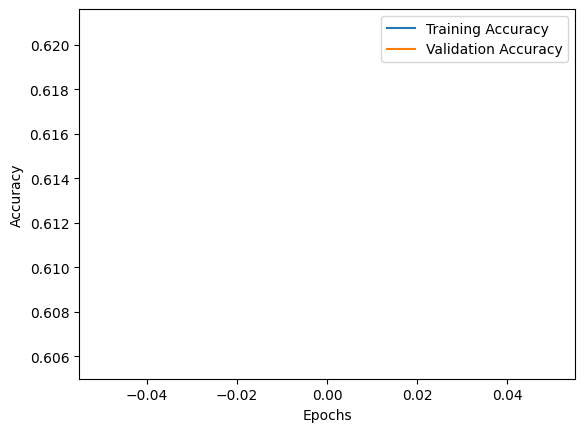

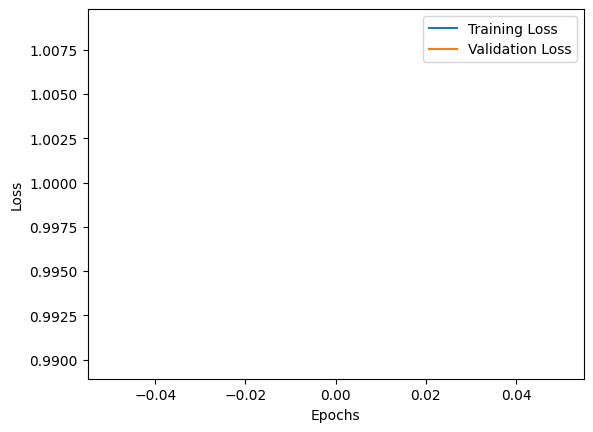

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 0.5924 - loss: 0.9881

**Save the model**

In [ ]:
import joblib

# Save the model as a .pkl file
joblib.dump(model, 'flower.pkl')
print("Model saved as 'flower_classification_model.pkl'")



Model saved as 'flower_classification_model.pkl'


In [ ]:
import gradio as gr
import numpy as np
import joblib
from tensorflow.keras.utils import load_img, img_to_array

# Load the pre-trained model
model = joblib.load("/content/flower.pkl")

# Define the class names (must match the training dataset order)
class_names = ['Daisy', 'Rose', 'Sunflower', 'Tulip', 'Dandelion']

# Function to preprocess the image and make predictions
def predict_flower(image):
    # Resize and preprocess the image
    img = image.resize((150, 150))  # Resize image to match the model input
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array.reshape((1, 150, 150, 3))  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return f"The predicted flower is: {predicted_class}"

# Create the Gradio interface
title = "Flower Classification"
description = "Upload an image of a flower, and the model will predict the type of flower (Daisy, Rose, Sunflower, Tulip, or Dandelion)."

gr_interface = gr.Interface(
    fn=predict_flower,  # Function to process predictions
    inputs=gr.Image(type="pil"),  # Input: Image (PIL format)
    outputs=gr.Textbox(),  # Output: Textbox for predicted class
    title=title,
    description=description
)

# Launch the Gradio app
if __name__ == "__main__":
    gr_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://521eacdab56a702671.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
